In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from mplsoccer.pitch import Pitch
import mplsoccer
from scipy.spatial import ConvexHull
from scipy import stats

In [2]:
df  =pd.read_excel('E:/Docs/Data/England_Premier-League_2022-2023_Tottenham_vs_Manchester United.xlsx')

In [3]:
df

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
0,0,0.0,a,50.1,49.7,Pass,Successful,Bruno Fernandes,36.8,48.1,0.0,-0.003385,8,AMC,Manchester United,England,Premier-League,2022-2023
1,0,2.0,a,36.6,50.0,Pass,Successful,Casemiro,28.8,85.0,0.0,-0.002197,18,DMC,Manchester United,England,Premier-League,2022-2023
2,0,5.0,a,28.8,84.1,Pass,Successful,Diogo Dalot,38.6,93.2,0.0,0.001110,20,DL,Manchester United,England,Premier-League,2022-2023
3,0,6.0,a,38.6,93.2,carry,Successful,Jadon Sancho,34.4,93.3,NaN,-0.000717,25,AML,Manchester United,England,Premier-League,2022-2023
4,0,7.0,a,34.4,93.3,Pass,Successful,Jadon Sancho,25.4,94.4,0.0,-0.001567,25,AML,Manchester United,England,Premier-League,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,2,NaN,a,74.4,36.0,OffsideGiven,Unsuccessful,Marcus Rashford,NaN,NaN,0.0,NaN,10,FW,Manchester United,England,Premier-League,2022-2023
1948,8,NaN,h,75.3,71.1,OffsideGiven,Unsuccessful,Richarlison,NaN,NaN,0.0,NaN,9,AMC,Tottenham,England,Premier-League,2022-2023
1949,33,NaN,h,88.5,74.2,OffsideGiven,Unsuccessful,Richarlison,NaN,NaN,0.0,NaN,9,AMC,Tottenham,England,Premier-League,2022-2023
1950,75,NaN,a,64.2,63.6,OffsideGiven,Unsuccessful,Anthony Martial,NaN,NaN,0.0,NaN,9,Sub,Manchester United,England,Premier-League,2022-2023


In [4]:
df = df[df['team']=='Manchester United']

In [5]:
df

,minute,second,h_a,x,y,type,outcomeType,playerName,endX,endY,Setpiece,xT,shirtNo,position,team,country,competition,season
0,0,0.0,a,50.1,49.7,Pass,Successful,Bruno Fernandes,36.8,48.1,0.0,-0.003385,8,AMC,Manchester United,England,Premier-League,2022-2023
1,0,2.0,a,36.6,50.0,Pass,Successful,Casemiro,28.8,85.0,0.0,-0.002197,18,DMC,Manchester United,England,Premier-League,2022-2023
2,0,5.0,a,28.8,84.1,Pass,Successful,Diogo Dalot,38.6,93.2,0.0,0.001110,20,DL,Manchester United,England,Premier-League,2022-2023
3,0,6.0,a,38.6,93.2,carry,Successful,Jadon Sancho,34.4,93.3,NaN,-0.000717,25,AML,Manchester United,England,Premier-League,2022-2023
4,0,7.0,a,34.4,93.3,Pass,Successful,Jadon Sancho,25.4,94.4,0.0,-0.001567,25,AML,Manchester United,England,Premier-League,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,93,50.0,a,77.2,81.2,Pass,Unsuccessful,Luke Shaw,78.1,78.7,0.0,NaN,23,DC,Manchester United,England,Premier-League,2022-2023
1946,93,52.0,a,78.1,77.2,OffsidePass,Successful,Luke Shaw,88.2,46.9,0.0,NaN,23,DC,Manchester United,England,Premier-League,2022-2023
1947,2,NaN,a,74.4,36.0,OffsideGiven,Unsuccessful,Marcus Rashford,NaN,NaN,0.0,NaN,10,FW,Manchester United,England,Premier-League,2022-2023
1950,75,NaN,a,64.2,63.6,OffsideGiven,Unsuccessful,Anthony Martial,NaN,NaN,0.0,NaN,9,Sub,Manchester United,England,Premier-League,2022-2023


In [6]:
players = df['shirtNo'].unique()
players

array([ 8, 18, 20, 25, 14, 23,  2,  1, 29, 21, 10,  9, 17, 12, 27],
      dtype=int64)

In [7]:
starters = players[0:11]
starters

array([ 8, 18, 20, 25, 14, 23,  2,  1, 29, 21, 10], dtype=int64)

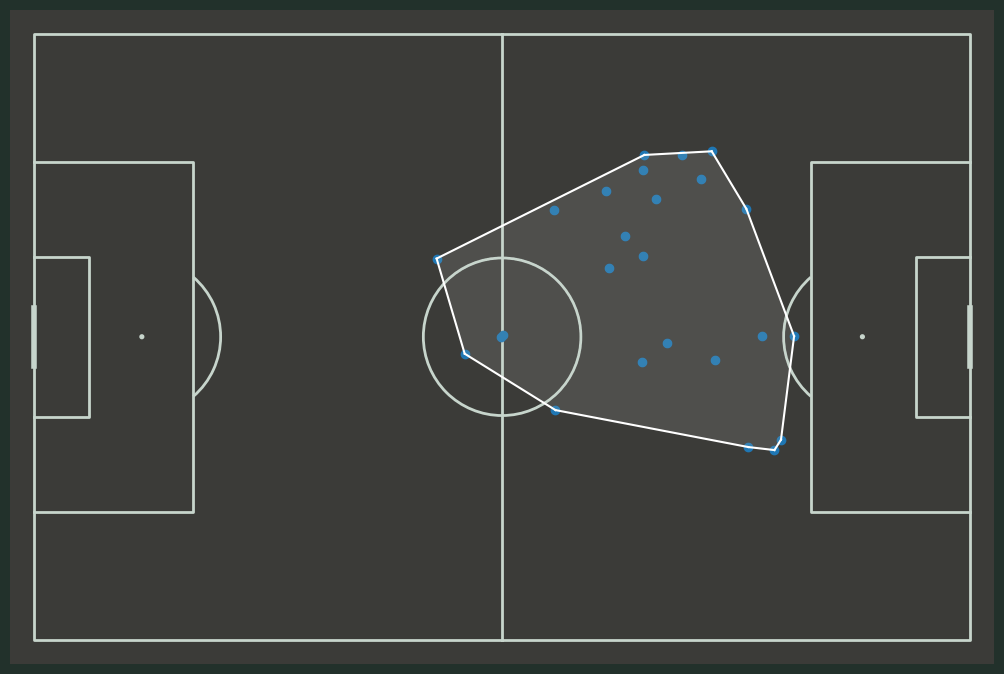

In [8]:

pitch = Pitch(pitch_type='opta', pitch_color='#3b3b38', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13,8.5), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

plt.gca().invert_yaxis()

df1 = df[df['shirtNo']==8]
df1 =df1[df1['type']=='Pass']

df1 = df1[(np.abs(stats.zscore(df1[['x','y']]))<1)]
df1 = df1.dropna(subset=['x'])
df1 = df1.dropna(subset=['y'])



points = df1[['x','y']].values
hull = ConvexHull(df1[['x','y']])
plt.scatter(df1.x,df1.y)

for i in hull.simplices:
    plt.plot(points[i,0],points[i,1],'white')
    plt.fill(points[hull.vertices,0],points[hull.vertices,1],c='white',alpha=.01)

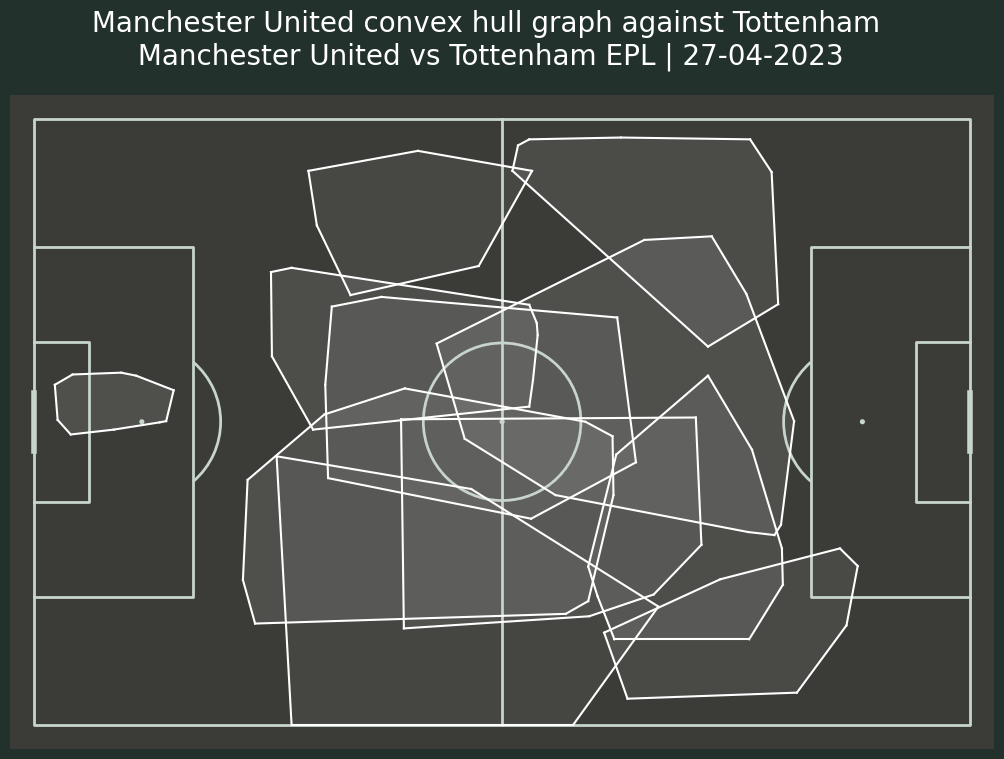

In [42]:
pitch = Pitch(pitch_type='opta', pitch_color='#3b3b38', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13,8.5), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

plt.gca().invert_yaxis()

for player in starters:
    df2 = df[df['shirtNo']==player]
    df2 =df2[df2['type']=='Pass']
    
    df2 = df2[(np.abs(stats.zscore(df2[['x','y']]))<1)]
    df2 = df2.dropna(subset=['x','y'])
    points = df2[['x','y']].values
    
    try:
        hull = ConvexHull(df2[['x','y']])
    except :
        pass
        
    try:
        for i in hull.simplices:
            plt.plot(points[i,0],points[i,1],'white')
            plt.fill(points[hull.vertices,0],points[hull.vertices,1],c='white',alpha=.01)
    except:
        pass
    
fig.suptitle(" Manchester United convex hull graph against Tottenham \n Manchester United vs Tottenham EPL | 27-04-2023", color='White',fontsize = 20)           
plt.show()

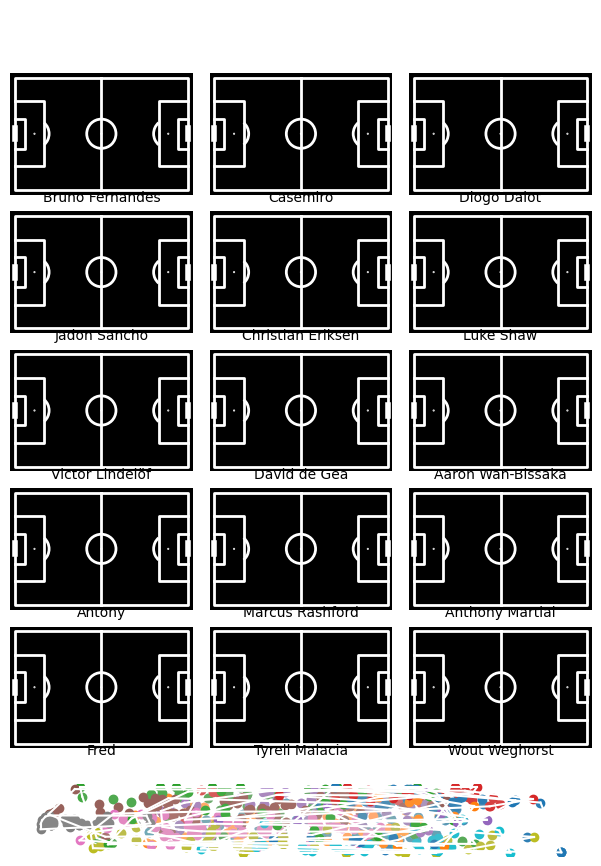

In [53]:
names = df['playerName'].unique()

#draw 4x4 pitches
pitch = mplsoccer.Pitch(pitch_type= 'opta',pitch_color='black',line_color='White')
fig, axs = pitch.grid(ncols = 3, nrows = 5, grid_height=0.75, title_height=0.06, axis=False,
                                           space=0.1,endnote_height=0.08, title_space=0.01, endnote_space=0.04)
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(50, -7, name,
            ha='center', va='center', fontsize=10)
    dfs = df.loc[df["playerName"] == name]
    
    df1 =dfs[dfs['type']=='Pass']

    df1 = df1[(np.abs(stats.zscore(df1[['x','y']]))<2)]
    df1 = df1.dropna(subset=['x','y'])

    points = df1[['x','y']].values
    hull = ConvexHull(df1[['x','y']])
    plt.scatter(df1.x,df1.y)

    for i in hull.simplices:
        plt.plot(points[i,0],points[i,1],'white')
        plt.fill(points[hull.vertices,0],points[hull.vertices,1],c='white',alpha=.01)

